In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

## QUICK REFERENCE TABLE

In [ ]:

quick_ref = """
┌───────────────────────┬─────────────────────────────────────┐
│ COMMAND               │ PURPOSE                             │
├───────────────────────┼─────────────────────────────────────┤
│ sp.symbols()          │ Create symbolic variables           │
│ sp.simplify()         │ Simplify expression                 │
│ sp.expand()           │ Expand expression                   │
│ sp.factor()           │ Factor expression                   │
│ sp.solve()            │ Solve equations                     │
│ sp.diff()             │ Differentiate                       │
│ sp.integrate()        │ Integrate                           │
│ sp.limit()            │ Compute limits                      │
│ sp.series()           │ Taylor series                       │
│ sp.Matrix()           │ Create matrix                       │
│ sp.dsolve()           │ Solve differential equations        │
│ sp.lambdify()         │ Convert to numeric function         │
│ expr.subs()           │ Substitute values                   │
│ expr.evalf()          │ Numeric evaluation                  │
│ sp.latex()            │ Convert to LaTeX                    │
│ sp.plot()             │ Plot symbolic functions             │
└───────────────────────┴─────────────────────────────────────┘
"""

print(quick_ref)



## SYMBOLS & VARIABLES


In [2]:
# Enable pretty printing (LaTeX-like output)
sp.init_printing(use_latex=True, use_unicode=True)


# Basic symbols
x, y, z = sp.symbols('x y z')
a, b, c = sp.symbols('a b c')

# Symbols with assumptions
x_real = sp.symbols('x', real=True)
y_positive = sp.symbols('y', positive=True)
z_integer = sp.symbols('z', integer=True)

# Greek letters
alpha, beta, gamma = sp.symbols('alpha beta gamma')
theta, phi, psi = sp.symbols('theta phi psi')

# Subscripts
x1, x2, x3 = sp.symbols('x1 x2 x3')
x_i, y_j = sp.symbols('x_i y_j')

# Multiple symbols at once
x0, x1, x2, x3 = sp.symbols('x0:4')  # x0, x1, x2, x3
all_x = sp.symbols('x:5')  # tuple (x0, x1, x2, x3, x4)

# Functions
f = sp.Function('f')
g = sp.Function('g')(x)  # g as function of x
f_x = f(x)

print("Symbols created:")
display(x, y_positive, alpha, x1, f_x)

Symbols created:


## BASIC EXPRESSIONS

In [19]:
expr1 = x**2 + 2*x + 1
expr2 = sp.sin(x) + sp.cos(y)
expr3 = sp.exp(x) * sp.log(y)
expr4 = (x**2 - 1)/(x - 1)

print("\nBasic expressions:")
display(expr1, expr2, expr3, expr4)

# sympify expression
sp.sympify("x**2 + 2*x + 1")
print("\nSympified expression:")
display(sp.sympify("x**2 + 2*x + 1"))


Basic expressions:



Sympified expression:


## SIMPLIFICATION & MANIPULATION

Simplification:


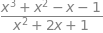

'simplifies to'

Expansion:


'expands to'

Factoring:


'factors to'

Canceling:


'cancels to'

In [7]:
# Simplify
expr = (x**3 + x**2 - x - 1)/(x**2 + 2*x + 1)
simplified = sp.simplify(expr)
print("Simplification:")
display(expr, "simplifies to", simplified)

# Expand
expanded = sp.expand((x + 1)**3)
print("Expansion:")
display((x + 1)**3, "expands to", expanded)

# Factor
factored = sp.factor(x**2 - y**2)
print("Factoring:")
display(x**2 - y**2, "factors to", factored)

# Collect terms
collected = sp.collect(x*y + x - 3 + 2*x**2 - z*x**2 + x**3, x)
print("Collecting terms in x:")
display(collected)

# Cancel common factors
cancelled = sp.cancel((x**2 - 1)/(x - 1))
print("Canceling:")
display((x**2 - 1)/(x - 1), "cancels to", cancelled)


## STATISTICS & PROBABILITY


In [ ]:
from sympy.stats import Normal, Exponential, Uniform, sample, E, variance

# Create random variables
X = Normal('X', 0, 1)           # Normal(μ=0, σ=1)
Y = Exponential('Y', 1)         # Exponential(λ=1)
Z = Uniform('Z', 0, 1)          # Uniform(0, 1)

# Compute statistics
expected = E(X**2)
var = variance(X)

# Probability density functions
pdf_normal = sp.stats.density(X)(x)
pdf_exp = sp.stats.density(Y)(x)

print("\nStatistics:")
display("E[X²] for X~N(0,1) =", expected)
display("PDF of Normal(0,1):", pdf_normal)

## CALCULUS

In [ ]:
# First derivative
f_prime = sp.diff(sp.sin(x), x)

# Second derivative
f_double_prime = sp.diff(sp.sin(x)*sp.exp(x), x, 2)

# Partial derivatives
f_xy = sp.diff(sp.sin(x*y), x, y)  # ∂²/∂x∂y

# Gradient (multivariate)
f_multi = x**2 + y**3
gradient = sp.Matrix([sp.diff(f_multi, var) for var in (x, y)])

print("\nDerivatives:")
display("d/dx sin(x) =", f_prime)
display("d²/dx² [sin(x)exp(x)] =", f_double_prime)
display("Gradient of x² + y³:", gradient)

# ========== INTEGRALS ==========
# Indefinite integral
int_sin = sp.integrate(sp.sin(x), x)

# Definite integral
int_def = sp.integrate(sp.exp(-x**2), (x, -sp.oo, sp.oo))

# Multiple integrals
int_double = sp.integrate(sp.exp(-x**2 - y**2), 
                          (x, -sp.oo, sp.oo), 
                          (y, -sp.oo, sp.oo))

print("\nIntegrals:")
display("∫ sin(x) dx =", int_sin)
display("∫_{-∞}^{∞} e^{-x²} dx =", int_def)

# ========== LIMITS ==========
limit_sinc = sp.limit(sp.sin(x)/x, x, 0)
limit_inf = sp.limit((1 + 1/x)**x, x, sp.oo)

print("\nLimits:")
display("lim_{x→0} sin(x)/x =", limit_sinc)
display("lim_{x→∞} (1 + 1/x)^x =", limit_inf)

# ========== TAYLOR SERIES ==========
taylor_exp = sp.series(sp.exp(x), x, 0, 6)  # Up to x^5
taylor_sin = sp.series(sp.sin(x), x, 0, 4).removeO()  # Remove O() term

print("\nTaylor series:")
display("e^x ≈", taylor_exp)
display("sin(x) ≈", taylor_sin)


Derivatives:


'd/dx sin(x) ='

'd²/dx² [sin(x)exp(x)] ='

'Gradient of x² + y³:'

⎡2⋅x ⎤
⎢    ⎥
⎢   2⎥
⎣3⋅y ⎦


Integrals:


'∫ sin(x) dx ='

'∫_{-∞}^{∞} e^{-x²} dx ='


Limits:


'lim_{x→0} sin(x)/x ='

'lim_{x→∞} (1 + 1/x)^x ='


Taylor series:


'e^x ≈'

'sin(x) ≈'

## SOLVING EQUATIONS

In [ ]:
# ========== ALGEBRAIC EQUATIONS ==========
# Single equation
solutions = sp.solve(x**2 - 1, x)

# System of equations
solution_system = sp.solve([x + y - 1, x - y - 3], [x, y])

# Polynomial roots
roots = sp.nroots(x**4 - 1, n=15)  # Numerical roots with 15-digit precision

print("\nSolving equations:")
display("x² - 1 = 0 has solutions:", solutions)
display("System x+y=1, x-y=3 has solution:", solution_system)
display("Numerical roots of x⁴ - 1:", roots)

# ========== DIFFERENTIAL EQUATIONS ==========
# ODE: f'(x) + f(x) = 0
f = sp.Function('f')
ode_sol = sp.dsolve(sp.Derivative(f(x), x) + f(x), f(x))

# Second order ODE: f''(x) - f(x) = 0
ode_sol2 = sp.dsolve(f(x).diff(x, 2) - f(x), f(x))

print("\nDifferential equations:")
display("f' + f = 0 has solution:", ode_sol)
display("f'' - f = 0 has solution:", ode_sol2)


Solving equations:


'x² - 1 = 0 has solutions:'

'System x+y=1, x-y=3 has solution:'

'Numerical roots of x⁴ - 1:'


Differential equations:


"f' + f = 0 has solution:"

"f'' - f = 0 has solution:"

## TRIGONOMETRIC MANIPULATION

In [8]:
# Trigonometric simplification
trig_expr = sp.sin(x)**2 + sp.cos(x)**2
trig_simp = sp.simplify(trig_expr)

# Expand trig functions
trig_expand = sp.expand_trig(sp.sin(2*x))

# Rewrite in terms of other functions
rewrite_sin = sp.sin(x).rewrite(sp.cos)
rewrite_exp = sp.cos(x).rewrite(sp.exp)

print("\nTrigonometric manipulation:")
display("sin²x + cos²x =", trig_simp)
display("sin(2x) expands to:", trig_expand)
display("sin(x) in terms of cos:", rewrite_sin)


Trigonometric manipulation:


'sin²x + cos²x ='

'sin(2x) expands to:'

'sin(x) in terms of cos:'

## MATRICES & LINEAR ALGEBRA

In [11]:
# ========== MATRIX CREATION ==========
M = sp.Matrix([[1, 2], [3, 4]])
N = sp.Matrix([[x, y], [1, 0]])

# ========== BASIC OPERATIONS ==========
matrix_sum = M + N
matrix_prod = M * N
matrix_pow = M**2
matrix_transpose = M.T

# ========== MATRIX PROPERTIES ==========
determinant = M.det()
inverse = M.inv()
trace = M.trace()

# ========== EIGENVALUES & EIGENVECTORS ==========
eigenvals = M.eigenvals()
eigenvects = M.eigenvects()

# ========== DECOMPOSITIONS ==========
rref = M.rref()  # Reduced row echelon form
nullspace = M.nullspace()  # Null space

print("\nMatrix operations:")
display("Matrix M =", M)
display("Determinant =", determinant)
display("Eigenvalues:", eigenvals)

# ========== SOLVING LINEAR SYSTEMS ==========
A = sp.Matrix([[1, 2], [3, 4]])
b = sp.Matrix([1, 2])
solution = A.LUsolve(b)  # Solve Ax = b

print("\nLinear system solution:")
display("Solving Ax = b where A =", A, "b =", b)
display("Solution x =", solution)


Matrix operations:


'Matrix M ='

⎡1  2⎤
⎢    ⎥
⎣3  4⎦

'Determinant ='

'Eigenvalues:'


Linear system solution:


'Solving Ax = b where A ='

⎡1  2⎤
⎢    ⎥
⎣3  4⎦

'b ='

⎡1⎤
⎢ ⎥
⎣2⎦

'Solution x ='

⎡ 0 ⎤
⎢   ⎥
⎣1/2⎦

## VECTOR CALCULUS

In [12]:
from sympy.vector import CoordSys3D, gradient, divergence, curl

# Create coordinate system
R = CoordSys3D('R')

# Define vector field
F = R.x**2 * R.i + R.y**2 * R.j + R.z**2 * R.k

# Compute operations
grad = gradient(R.x*R.y*R.z, R)
div = divergence(F, R)
curl_F = curl(F, R)

print("\nVector calculus:")
display("Vector field F =", F)
display("Gradient of xyz:", grad)
display("Divergence of F:", div)
display("Curl of F:", curl_F)


Vector calculus:


'Vector field F ='

'Gradient of xyz:'

'Divergence of F:'

'Curl of F:'

## NUMBER THEORY

In [ ]:
# Prime factorization
factors = sp.factorint(123456)

# GCD and LCM
gcd_val = sp.gcd(36, 48)
lcm_val = sp.lcm(12, 18)

# Primality testing
is_prime = sp.isprime(17)
next_prime = sp.nextprime(100)

# Combinatorics
fibonacci = sp.fibonacci(10)
binomial = sp.binomial(10, 3)
factorial = sp.factorial(5)

print("\nNumber theory:")
display("Prime factors of 123456:", factors)
display("GCD(36, 48) =", gcd_val)
display("10 choose 3 =", binomial)


Number theory:


'Prime factors of 123456:'

'GCD(36, 48) ='

'10 choose 3 ='

## OPTIMIZATION & ROOT FINDING

In [14]:
# Find critical points
f = x**3 - 3*x**2 + 4
critical_points = sp.solve(sp.diff(f, x), x)

# Second derivative test for minima/maxima
for cp in critical_points:
    second_deriv = sp.diff(f, x, 2).subs(x, cp)
    print(f"Critical point x = {cp}: f'' = {second_deriv}")

# Lagrange multipliers for constrained optimization
L = sp.symbols('L')  # Lagrange multiplier
objective = x**2 + y**2
constraint = x + y - 1

# Lagrangian: L(x,y,λ) = f(x,y) + λ*g(x,y)
lagrangian = objective + L*constraint

# Solve system: ∇L = 0
solution_opt = sp.solve([sp.diff(lagrangian, var) for var in (x, y, L)], 
                        [x, y, L])

print("\nOptimization:")
display("Critical points of x³ - 3x² + 4:", critical_points)
display("Constrained optimum:", solution_opt)

Critical point x = 0: f'' = -6
Critical point x = 2: f'' = 6

Optimization:


'Critical points of x³ - 3x² + 4:'

'Constrained optimum:'

## NUMERICAL EVALUATION

In [26]:
# Convert to numeric
expr_num = sp.sqrt(2)

# Various numeric conversions
as_float = float(expr_num)
as_complex = complex(expr_num)
high_precision = expr_num.evalf(50)  # 50-digit precision

# Lambdify: convert symbolic expression to numeric function
f_sym = sp.sin(x)
f_num = sp.lambdify(x, f_sym, 'numpy')

# Test numeric function
x_vals = np.linspace(0, 2*np.pi, 100)
y_vals = f_num(x_vals)

print("\nNumerical evaluation:")
display("√2 as float:", as_float)
display("√2 with 50 digits:", high_precision)


Numerical evaluation:


'√2 as float:'

'√2 with 50 digits:'

## PLOTTING

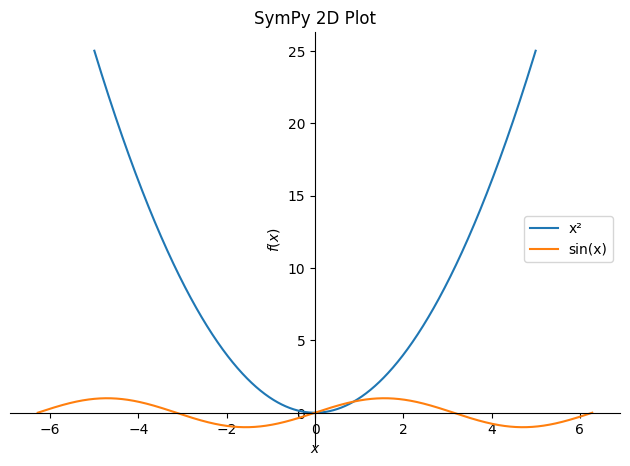

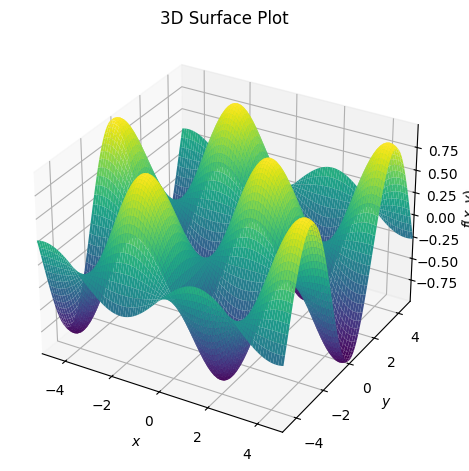

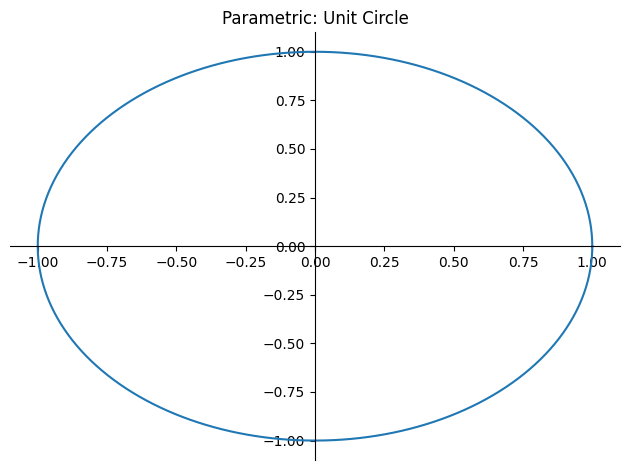

In [28]:
from sympy.plotting import plot, plot3d, plot_parametric

# 2D plotting
p1 = plot(x**2, (x, -5, 5), show=False, label='x²')
p2 = plot(sp.sin(x), (x, -2*sp.pi, 2*sp.pi), show=False, label='sin(x)')
p1.extend(p2)
p1.legend = True
p1.title = 'SymPy 2D Plot'
p1.show()

# 3D plotting
plot3d(sp.sin(x)*sp.cos(y), (x, -5, 5), (y, -5, 5), 
       title='3D Surface Plot')

# Parametric plot
t=sp.symbols('t')
plot_parametric(sp.cos(t), sp.sin(t), (t, 0, 2*sp.pi),
                title='Parametric: Unit Circle')

## UTILITIES & CONVERSIONS

In [29]:
# Convert to LaTeX
latex_expr = sp.latex(sp.Integral(sp.exp(-x**2), (x, -sp.oo, sp.oo)))

# Pattern matching
expr = sp.sin(x) + sp.cos(x)
pattern = sp.sin(sp.Wild('w')) + sp.cos(sp.Wild('w'))
match = expr.match(pattern)

# Substitution
expr_sub = x**2 + 2*x + 1
substituted = expr_sub.subs(x, 2)
multi_sub = expr_sub.subs({x: 3, y: 4})

# Extract coefficients
poly = 3*x**2 + 2*x + 1
coeff_x2 = poly.coeff(x, 2)
coeff_x1 = poly.coeff(x, 1)

print("\nUtilities:")
display("LaTeX output:", latex_expr)
display("After substitution x=2:", substituted)
display("Coefficient of x²:", coeff_x2)


Utilities:


'LaTeX output:'

'\\int\\limits_{-\\infty}^{\\infty} e^{- x^{2}}\\, dx'

'After substitution x=2:'

'Coefficient of x²:'

## SPECIAL FUNCTIONS

In [30]:
# Gamma function
gamma_val = sp.gamma(5)  # Γ(5) = 4!

# Bessel functions
bessel_j = sp.besselj(0, x)
bessel_y = sp.bessely(1, x)

# Error function
error_func = sp.erf(x)

# Dirac delta and Heaviside
dirac = sp.DiracDelta(x - 1)
heaviside = sp.Heaviside(x)

# Legendre polynomials
legendre = sp.legendre(3, x)  # P₃(x)

print("\nSpecial functions:")
display("Γ(5) =", gamma_val)
display("J₀(x) =", bessel_j)
display("Legendre polynomial P₃(x) =", legendre)


Special functions:


'Γ(5) ='

'J₀(x) ='

'Legendre polynomial P₃(x) ='

## COMMON PATTERNS & RECIPES

In [31]:
# Pattern 1: Verify equality
expr1 = (x + 1)**2
expr2 = x**2 + 2*x + 1
are_equal = sp.simplify(expr1 - expr2) == 0

# Pattern 2: Solve and verify
poly = x**3 - 6*x**2 + 11*x - 6
solutions = sp.solve(poly, x)
for sol in solutions:
    print(f"x = {sol}: poly(x) = {poly.subs(x, sol)}")

# Pattern 3: Function composition
f = sp.sin(x)**2 + sp.cos(x)**2
sp.simplify(f)  # Should be 1

# Pattern 4: Series expansion for approximation
approx = sp.series(sp.exp(x), x, 0, 4).removeO()
print(f"\nApproximation of e^x near 0: {approx}")

# Pattern 5: Partial fraction decomposition
expr_frac = 1/((x-1)*(x-2))
partial_frac = sp.apart(expr_frac)

print("\nCommon patterns:")
display("Partial fractions of 1/[(x-1)(x-2)]:", partial_frac)

x = 1: poly(x) = 0
x = 2: poly(x) = 0
x = 3: poly(x) = 0

Approximation of e^x near 0: x**3/6 + x**2/2 + x + 1

Common patterns:


'Partial fractions of 1/[(x-1)(x-2)]:'

## PERFORMANCE TIPS

In [32]:
# Tip 1: Use specific simplifiers instead of simplify()
# simplify() can be slow; try these instead:
sp.expand_trig(expr)   # For trigonometric expressions
sp.cancel(expr)        # For rational expressions
sp.factor(expr)        # For polynomial factorization

# Tip 2: Use lambdify() for numerical evaluation of many points
f_sym = sp.sin(x) * sp.exp(-x**2)
f_num = sp.lambdify(x, f_sym, 'numpy')
# f_num is now a fast numpy function

# Tip 3: Cache results for repeated operations
from sympy import cacheit

@cacheit
def expensive_operation(expr):
    return sp.simplify(expr**10)

# Tip 4: Use matrices for linear algebra (faster than lists)
# Tip 5: Pre-generate symbols for loops

print("\nPerformance tips:")
print("1. Use specific simplifiers, not just simplify()")
print("2. Use lambdify() for numerical work")
print("3. Cache results with @cacheit decorator")


Performance tips:
1. Use specific simplifiers, not just simplify()
2. Use lambdify() for numerical work
3. Cache results with @cacheit decorator


## DEBUGGING & TROUBLESHOOTING

In [33]:
# Check assumptions on symbols
print(f"\nDebugging:")
print(f"x assumptions: {x.assumptions0}")
print(f"y (positive) assumptions: {y_positive.assumptions0}")

# Check if expression is real
is_real = expr1.is_real

# Find free symbols in expression
free_symbols = expr1.free_symbols

# Check if expression has a specific form
has_sin = expr1.has(sp.sin)

print(f"Free symbols in {expr1}: {free_symbols}")
print(f"Has sin function? {has_sin}")


Debugging:
x assumptions: {'commutative': True}
y (positive) assumptions: {'commutative': True, 'complex': True, 'extended_negative': False, 'extended_nonnegative': True, 'extended_nonpositive': False, 'extended_nonzero': True, 'extended_positive': True, 'extended_real': True, 'finite': True, 'hermitian': True, 'imaginary': False, 'infinite': False, 'negative': False, 'nonnegative': True, 'nonpositive': False, 'nonzero': True, 'positive': True, 'real': True, 'zero': False}
Free symbols in (x + 1)**2: {x}
Has sin function? False


## EXAMPLES

In [36]:
# MWE 1: Basic calculus
print("\n1. Basic Calculus:")
x = sp.symbols('x')
f = sp.sin(x) * sp.exp(x)
f_prime = sp.diff(f, x)
f_integral = sp.integrate(f, x)
display("f(x) =", f)
display("f'(x) =", f_prime)
display("∫f(x)dx =", f_integral)

# MWE 2: Solve quadratic
print("\n2. Solve Quadratic:")
solutions = sp.solve(x**2 - 5*x + 6, x)
display("x² - 5x + 6 = 0 has solutions:", solutions)

# MWE 3: Matrix eigenvalues
print("\n3. Matrix Eigenvalues:")
M = sp.Matrix([[1, 2], [2, 1]])
eigenvals = M.eigenvals()
display("Matrix:", M)
display("Eigenvalues:", eigenvals)


1. Basic Calculus:


'f(x) ='

"f'(x) ="

'∫f(x)dx ='


2. Solve Quadratic:


'x² - 5x + 6 = 0 has solutions:'


3. Matrix Eigenvalues:


'Matrix:'

⎡1  2⎤
⎢    ⎥
⎣2  1⎦

'Eigenvalues:'

In [ ]:
# solve local minima 
def solve_local_minima(polynomial):
    """
    Find all local minima of a univariate polynomial.
    
    Args:
        polynomial (str): Polynomial expression as string (e.g., "x**3 - 3*x**2 + 4")
    
    Returns:
        list: List of local minima (as floats)
        or None if no minima found or error
    """
    try:
        # Define variable
        x = sp.symbols('x', real=True)  # Assume real variable
        
        # Parse polynomial
        f = sp.sympify(polynomial, locals={'x': x})
        
        # First derivative
        f_prime = sp.diff(f, x)
        
        # Second derivative
        f_double_prime = sp.diff(f, x, 2)
        
        # Find critical points (where f'(x) = 0)
        critical_points = sp.solve(f_prime, x)
        
        if not critical_points:
            return None
        
        minima = []
        
        for cp in critical_points:
            # Check if critical point is real
            if not cp.is_real:
                continue
                
            # Evaluate second derivative
            second_deriv_val = f_double_prime.subs(x, cp)
            
            # Check if it's a minimum (f'' > 0)
            # Use N() for numeric evaluation
            if sp.N(second_deriv_val) > 0:
                # Convert to float and round
                minima.append(float(sp.N(cp)))
        
        # Remove duplicates and sort
        if minima:
            minima = sorted(list(set(round(m, 4) for m in minima)))
            return minima
        else:
            return None
            
    except Exception as e:
        print(f"Error solving polynomial: {e}")
        return None

# Test cases
test_polynomials = [
    "x**2",                    # Min at x=0
    "x**3 - 3*x**2 + 4",       # Min at x=2
    "x**4 - 4*x**3 + 6*x**2 - 4*x + 1",  # Min at x=1
    "x**3",                    # No min (inflection at x=0)
    "x**2 + 2*x + 1",          # Min at x=-1
    "sin(x)",                  # Not a polynomial but will work
]

for poly in test_polynomials:
    minima = solve_local_minima(poly)
    print(f"{poly:40} → Minima: {minima}")

x**2                                     → Minima: [0.0]
x**3 - 3*x**2 + 4                        → Minima: [2.0]
x**4 - 4*x**3 + 6*x**2 - 4*x + 1         → Minima: None
x**3                                     → Minima: None
x**2 + 2*x + 1                           → Minima: [-1.0]
sin(x)                                   → Minima: [4.7124]
